# Sign Language Recognition for British Sign Language

### <u> Overview of Project </u>
The aim of this project is to develop a sign language recognition model for British Sign Language, that can detect/translate sign gestures. Our approach will involve technologies like TensorFlow (building, training/testing deep learning models), MediaPipe (detecting landmarks of hands) and OpenCV (accessing camera input for data collection). 


## Section 1 - Install and Import Dependancies

Section 1 is essentially setting up the environment and importing all the necessary dependancies that are leveraged for our data collection task, detecting hands, creating training performance graphs etc. The most important is Tensorflow, this is essential for building the deep learning models. 


In [ ]:
!pip install tensorflow==2.14.0 mediapipe==0.10.5 matplotlib opencv-python scikit-learn seaborn gTTS playsound

In [ ]:
!python --version

In [5]:
import cv2
import mediapipe as mp
import tensorflow
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns
from gtts import gTTS
from playsound import playsound

## Section 2 - Setting Up Data Collection

### Data Collection Approach
Before data collection, we need to start setting up our data collection folders and initialising/testing OpenCV and MediaPipe detections. In our case, we are aiming to collect a maximum of 20 participants for 32 gestures, recording 40 frames each for 10 videos. 

This section will involve initialising the Mediapipe library. It is important to test webcam and observe if opencv can access the webcam, as well as testing Mediapipe using the webcam (it should draw the detections on display). Most importantly, we will need to extract the landmarks from mediapipe for data collection, and will need to test if this function works correctly.



In [6]:
#This is where all data captured will be stored
data_folder = 'MEDIAPIPE_DATA'

signs = ['hello','good','sorry','how are you','wait','morning',
        'A','B','C','D','E','F','G','H','I','J','K','L','M','N',
         'O','P','Q','R','S','T','U','V','W','X','Y','Z']

participants = 20
num_of_videos = 30

#number of frames captured per video
num_of_frames = 40

In [ ]:
#Each participant folder contains every sign gesture folder that contains 10 video folders (storing keypoints) and a video file folder (storing videos)
for participant in range(1,participants+1):
    for sign in signs:
        for video in range(1,num_of_videos+1):
            try:
                os.makedirs(os.path.join(data_folder,f"Participant{participant}", sign,str(video)))
                os.makedirs(os.path.join(data_folder,f"Participant{participant}", sign,"Video Files"))
            except:
                pass
                     

In [3]:
#access webcam using open cv, 0 meaning webcam, 1 being mp4 file
cap = cv2.VideoCapture(0)
cv2.startWindowThread()

while cap.isOpened():
    success, frame = cap.read()
    
    if not success:
        print("Empty Frame")
        pass
    
    cv2.imshow("SLR4BSL", frame)
    
    #close video capture
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Section 2.1 - Initialising Mediapipe

In this project, we will be leveraging Mediapipe Hands, which detects 63 landmarks of the hands. For this section, we will be following the guidance set by MediaPipe (https://github.com/google/mediapipe/blob/master/docs/solutions/hands.md) for initalising the model. This covers how to process the hands, as well as viewing/printing the detected landmarks. This will give us an inital starting point of how to leverage MediaPipe, start the detections, view the drawn landmarks and also print the detected landmarks.



In [7]:
#Mediapipe Hands Model
mp_hands = mp.solutions.hands

#Mediapipe Drawing Utils for Drawing Landmarks
mp_drawing_utils = mp.solutions.drawing_utils

In [5]:
#initalising holistic model
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)
cap = cv2.VideoCapture(0)
cv2.startWindowThread()

while cap.isOpened():
    success, frame = cap.read()
    
    if not success:
        print("Empty Frame")
        pass
    
    try:
        #opencv reads frame in color format BGR so we need to convert to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #making image non writeable helps save space
        image.flags.writeable = False
        #start detecting hands in frame
        results = hands.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #x y z coordinates of each landmark of the hand detected
        print(results.multi_hand_landmarks)
        
        #drawing landmarks of the hands - if hands are detected then draw landmarks
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing_utils.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                                mp_drawing_utils.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2),
                                                mp_drawing_utils.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2))


        cv2.imshow("SLR4BSL", image)

    except:
        pass
     #close video capture logic
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
    
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


None
None
None
None
None
None
None
None
None
None
None
None
None
None
[landmark {
  x: 0.9404485
  y: 0.74634343
  z: 4.0126173e-07
}
landmark {
  x: 0.86555284
  y: 0.73832077
  z: -0.014348846
}
landmark {
  x: 0.8061895
  y: 0.6916534
  z: -0.028238483
}
landmark {
  x: 0.7630304
  y: 0.6281654
  z: -0.038563866
}
landmark {
  x: 0.7354244
  y: 0.57264966
  z: -0.04963364
}
landmark {
  x: 0.8195115
  y: 0.57877123
  z: -0.051823437
}
landmark {
  x: 0.77951795
  y: 0.45948032
  z: -0.0725705
}
landmark {
  x: 0.7616152
  y: 0.39283782
  z: -0.0818159
}
landmark {
  x: 0.7482087
  y: 0.34138125
  z: -0.08768233
}
landmark {
  x: 0.86181134
  y: 0.5346363
  z: -0.05492771
}
landmark {
  x: 0.8367596
  y: 0.399952
  z: -0.071286686
}
landmark {
  x: 0.82303166
  y: 0.33044496
  z: -0.0755362
}
landmark {
  x: 0.81191576
  y: 0.2803294
  z: -0.079527654
}
landmark {
  x: 0.9083089
  y: 0.51190364
  z: -0.0572924
}
landmark {
  x: 0.89838976
  y: 0.3888377
  z: -0.076711684
}
landmark {

-1

In [8]:
#encapsulating mediapipe detection process into a function - it is repeated often
def mediapipe_detections(hands, frame):
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #making image non writeable helps save space
    image.flags.writeable = False
    
    #start detecting hands in frame
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing_utils.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                            mp_drawing_utils.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2),
                                            mp_drawing_utils.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2))
    return results, image

### Section 2.2 - Extracting Landmarks

Now that we have initialised Mediapipe and tested it's detection using the webcam, we will need to extract the landmarks of the hand from Mediapipe. If you look back at the previous section where we created the drawing function, you can see the line of code 'results.pose_landmarks'. This is essentially how we will extract them, by using the results from the hands model. The landmarks extracted will be stored in a numpy array and saved as a numpy file during data collection.



In [7]:
#example of extracting
print(np.array(results.multi_hand_landmarks))

#Lengths of all landmark arrays - necessary to create empty arrays when hands/body not detected
print("left hand landmarks: ", len(results.multi_hand_landmarks[-1].landmark))


None


TypeError: 'NoneType' object is not subscriptable

In [8]:
#check if hands were detected
if results.multi_hand_landmarks:
    hands = np.array([[res.x,res.y,res.z] for res in results.multi_hand_landmarks[-1].landmark]).flatten()
else:
    #the model leveraged will expect the same total number of landmarks (63), so we need a zeros array when not detected
    hands = np.zeros(21*3)


print(hands)
print(hands.shape)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(63,)


## Section 3 - Data Collection

Now that we have set up our folders, and tested OpenCV/MediaPipe detections, we can go ahead and record short videos of sign letters/gestures. It will be the same logic of setting up the camera as we did in the beginning of section 2 but this time the videos and landmark data of the gestures will be extracted. The short videos and landmarks will be saved in their respective participant folder. After data collection, we will need to join all sequences from each folder together into one numpy array so we can split this into training and testing, using scikit learn. 

### <u>How is this done?</u>
First, lets think about how the data is organised. Each participant folder contains subfolders of each sign gesture, where in each sign gesture folder contains sub folders of 10 video folders that will contain numpy files of landmark data and the recorded video. So, during data collection, each sign gesture is performed by the participant and recorded a set number of times (num_of_videos=10). Every video will have MediaPipe Hands running and extracting the landmark detections at each frame. 

For example, if we are recording the 1st video of the sign gesture Hello, we extract the landmarks of the hands at each frame of the video (num_of_frames=40) and save it as a numpy file to the 1st Video Folder that is contained in the Sign Folder Hello

### Section 3.1 - Data Collection

Since our participants are beginners at BSL, we need time to teach them each gesture, which is why we go through each gesture step by step instead of perfoming a loop through all gestures. 



In [3]:
current_sign = "wait"
current_participant = 'Participant6'

In [10]:
#Without pausing between new videos - videos will be taken very quickly and wont allow to restart gesture from beginning
def new_frame(image,frame_num):
    
    #At the first frame of every video, it will pause - showing a red circle, otherwise it will continue - showing a green circle
    if frame_num==1:
        cv2.circle(image,(60,100),25,(0,0,255),-1)
        cv2.putText(image,"NEW VIDEO", (350,650),
                    cv2.FONT_HERSHEY_SIMPLEX, 3 ,(0,0,255), 3, cv2.LINE_AA)
        cv2.imshow("SLR4BSL Data Collection", image)
        print("Waiting for new frame, get into position...")
        cv2.waitKey(2000)
    else:
        cv2.circle(image,(60,100),25,(0,255,0),-1)
        cv2.putText(image,f"{current_sign}:{video_num}", (350,650),
                    cv2.FONT_HERSHEY_SIMPLEX, 3 ,(255,255,255), 3, cv2.LINE_AA)
        cv2.imshow("SLR4BSL Data Collection", image)
        
        
        
        

In [ ]:
#initalising holistic model
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)
cap = cv2.VideoCapture(0)
cv2.startWindowThread()

#To store videos recorded from webcam - we need the width,height and format which opencv provides
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

#For every video it will write a new video to store
for video_num in range(0, num_of_videos+1):
    video = cv2.VideoWriter(os.path.join(data_folder,current_participant,current_sign,"Video Files",
                                         f"{current_sign}-{video_num}.mp4"),fourcc,20,(frame_width,frame_height))
    
    for frame_num in range(1,num_of_frames+1):
        success, frame = cap.read()

        if not success:
            print("Empty Frame")
            pass

       
        try:
            #process mediapipe detections for each frame
            results,image = mediapipe_detections(hands,frame)
            
            #pause at the start of a new video
            new_frame(image,frame_num)
            
            #extract the keypoint data of hands for each frame
            if results.multi_hand_landmarks:
                hand_keypoints = np.array([[res.x,res.y,res.z] for res in results.multi_hand_landmarks[-1].landmark]).flatten()
            else:
                #the model leveraged will expect the same total number of landmarks (63), so we need a zeros array when hands not detected
                hand_keypoints = np.zeros(21*3)
                
            
            #after extracting the keypoint data - we store it in the data folder for the specific participant, 
            np.save(os.path.join(data_folder,current_participant,current_sign,
                                 str(video_num),str(frame_num)),hand_keypoints)
            
            #each frame is written to the video variable until a new video is initialised
            video.write(frame)
           
  

        except:
            pass
         #close video capture logic
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break

video.release()
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [4]:
for sign in signs:
    for video_num in range(1,num_of_videos+1):
        #After collecting all videos for a participant, we need to verify all 
        video_filePath = os.path.join(data_folder,f'{current_participant}',f'{sign}','Video Files',f'{sign}-{video_num}.mp4')
        if os.path.exists(video_filePath):
            cap = cv2.VideoCapture(video_filePath)
            cv2.startWindowThread()


            while cap.isOpened():
                success, frame = cap.read()

                if not success:
                    print("End of Video")
                    break

                cv2.putText(frame,f'{sign}',(450,650),
                        cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0),3, cv2.LINE_AA)


                cv2.imshow("SLR4BSL", frame)

                 #close video capture logic
                if cv2.waitKey(50) & 0xFF==ord('q'):
                    break
        else:
            pass


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

End of Video
End of Video
End of Video
End of Video
End of Video
End of Video


-1

### Section 3.2 - Splitting Into Training/Testing 

Since all the data collected are stored in sperate folders for each participant, we need to bring it all together so we can split it into training/testing sets. 

In [9]:
#This will help splitting our dataset to training/test set
from sklearn.model_selection import train_test_split

#This will allow us to one hot encode our labels, which right now are categorical
from tensorflow.keras.utils import to_categorical

In [10]:
#the sequence array will store all keypoint data for every video of sign gestures
sequences=[]

#this will store our label data
label_indices=[]

In [11]:
for num in range(1, participants+1):
    for sign in signs:
        for video in range(1,num_of_videos+1):
            #temporary store all 30 frames of keypoints for each video
            video_keypoints = []
            video_path = os.path.join(data_folder,f"Participant{num}",sign,str(video))
            
            if os.path.exists(video_path):
            
                #convert categorical label to numerical (hello ---> 0)
                label_indices.append(signs.index(sign))

                for frame in range(1,num_of_frames+1):
                    numpy_file = np.load(os.path.join(video_path, f"{frame}.npy"))

                    #append keypoints from each frame 
                    video_keypoints.append(numpy_file)

                #append with total extracted keypoints in a video 
                sequences.append(video_keypoints)
            else:
                pass

In [12]:
print(np.array(sequences).shape)
print(np.array(label_indices).shape)

(2560, 40, 63)
(2560,)


In [13]:
#labels before one hot encoding
print(label_indices)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [15]:
#one hot encoding labels for the model
one_hot_encoded_labels = to_categorical(label_indices, num_classes=32)

#labels after one hot encoding
print(one_hot_encoded_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [17]:
#the keypoint data is stored in X and label data in Y - now we can split into training/testing
X = np.array(sequences)
y = one_hot_encoded_labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [18]:
print("Training Data Shape: ",X_train.shape)
print("Test Data Shape: ",X_test.shape)

Training Data Shape:  (2048, 40, 63)
Test Data Shape:  (512, 40, 63)


## Section 4 - Building Deep Learning Model

##### Section 4 is all about building our model architectures. 
##### Here we have many variations of the temporal models (LSTM, RNN, GRU) to experiment with. The input shape of each architecture (40,63) refers to how we collected the data. The shape of our data training data (2560,40,63) and test data (560,40,63) shows that in each of the 2560 videos contains 40 keypoint arrays where each array contains 63 landmarks of the hands. 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN,Dropout,Dense, Bidirectional
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler

In [20]:
model = Sequential()

model.add(LSTM(256,return_sequences=True,activation='relu',input_shape=(40,63)))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(GRU(256,return_sequences=True,activation='tanh',input_shape=(40,63)))
model.add(GRU(256,return_sequences=True,activation='tanh'))
model.add(GRU(128,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(256,return_sequences=True,activation='relu'),input_shape=(40,63)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128,return_sequences=True,activation='relu')))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128,activation='relu')))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(LSTM(128,return_sequences=True,activation='relu',input_shape=(40,63)))
model.add(Bidirectional(LSTM(128,activation='relu')))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(SimpleRNN(256,return_sequences=True,activation='relu',input_shape=(40,63)))
model.add(SimpleRNN(256,return_sequences=True,activation='relu'))
model.add(SimpleRNN(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(Bidirectional(SimpleRNN(256,return_sequences=True,activation='relu'),input_shape=(40,63)))
model.add(Bidirectional(SimpleRNN(256,return_sequences=True,activation='relu')))
model.add(Bidirectional(SimpleRNN(128,activation='relu')))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(SimpleRNN(256,return_sequences=True,activation='relu',input_shape=(40,63)))
model.add(GRU(256,return_sequences=True,activation='tanh'))
model.add(GRU(128,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(SimpleRNN(256,return_sequences=True,activation='relu',input_shape=(40,63)))
model.add(LSTM(256,return_sequences=True,activation='tanh'))
model.add(LSTM(128,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(LSTM(256,return_sequences=True,activation='relu',input_shape=(40,63)))
model.add(GRU(256,return_sequences=True,activation='tanh'))
model.add(GRU(128,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(GRU(256,return_sequences=True,activation='tanh',input_shape=(40,63)))
model.add(LSTM(256,return_sequences=True,activation='relu'))
model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(Bidirectional(GRU(256,return_sequences=True,activation='tanh'),input_shape=(40,63)))
model.add(Bidirectional(GRU(256,return_sequences=True,activation='tanh')))
model.add(Bidirectional(GRU(128,activation='tanh')))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model = Sequential()

model.add(GRU(256,return_sequences=True,activation='tanh',input_shape=(40,63)))
model.add(Bidirectional(GRU(256,return_sequences=True,activation='tanh')))
model.add(Bidirectional(GRU(128,activation='tanh')))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           327680    
                                                                 
 dropout (Dropout)           (None, 40, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 128)           197120    
                                                                 
 dropout_1 (Dropout)         (None, 40, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

## Section 5 - Training Deep Learning Model

##### After we have collected our data and built our deep learning model architecture, we can now train our model using the training data. It is important to save the training process as we did with 'hist' as well as leveraging TensorBoard, so we can view insightful graphs of the training performance. Also, before training the model, it is useful to know if the model can handle the data collected, by testing it against our test data.

In [22]:
#Testing model before training - to observe if model architecture can hanlde the data and provide results
results = model(X_test)

#The results return arrays of probability distributions for each gesture predicted
print(results)

tf.Tensor(
[[0.03154037 0.03190737 0.03063718 ... 0.0307448  0.03211165 0.0316724 ]
 [0.03139472 0.03146368 0.03097326 ... 0.03099471 0.03169944 0.03149271]
 [0.03138167 0.03154904 0.03084151 ... 0.03078056 0.03184699 0.03141435]
 ...
 [0.03164391 0.03200217 0.03073036 ... 0.03084813 0.03209874 0.03142974]
 [0.03152972 0.03186702 0.03077046 ... 0.03081746 0.03201104 0.03139869]
 [0.03155777 0.03175646 0.03075093 ... 0.03079703 0.03199638 0.03157125]], shape=(512, 32), dtype=float32)


In [23]:
#This is how it is perfoming so far - obviously it knows nothing at all
for i in range(10):
    print("Predicted: ", signs[np.argmax(results[i])])
    print("Actual: ", signs[np.argmax(y_test[i])])

Predicted:  W
Actual:  G
Predicted:  W
Actual:  morning
Predicted:  W
Actual:  D
Predicted:  W
Actual:  H
Predicted:  W
Actual:  L
Predicted:  W
Actual:  M
Predicted:  W
Actual:  A
Predicted:  W
Actual:  U
Predicted:  W
Actual:  how are you
Predicted:  W
Actual:  U


In [24]:
#Testing loss function
loss = tensorflow.keras.losses.CategoricalCrossentropy()

test_loss = loss(results,y_test)
print(test_loss)

tf.Tensor(15.613899, shape=(), dtype=float32)


In [25]:
#In our case our models happened to plateu at 88% accuracy, so lowering the learning rate helped achieve higher accuracy above 90%
def LearningRate_Scheduler(epochs, lr):
    if epochs < 320:
        return lr
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(LearningRate_Scheduler)

In [ ]:
#metrics of model performance stored here to view on TensorBoard
logs_dir = os.path.join('gru-logs')
tensorboard_callback = TensorBoard(log_dir=logs_dir)

model.compile(tensorflow.keras.optimizers.legacy.Adam(learning_rate=0.0001,clipvalue=1.0), loss, metrics=['accuracy'])

#hist stores all accuracy and loss metrics, we can build graphs with this
hist = model.fit(X_train, y_train, epochs=650, batch_size=24, verbose=1,
                 shuffle=True,validation_data=(X_test,y_test), callbacks=[tensorboard_callback, lr_scheduler])
    

In [ ]:
#history of all accuracy, loss, val_accuracy, val_loss per epoch
hist.history

In [ ]:
fig,ax = plt.subplots(ncols=1, figsize=(10,5))

#We use the hist variable that stores all accuracy/loss metrics to build a graph
ax.plot(hist.history["loss"],color="teal", label="loss")
ax.plot(hist.history["val_loss"],color="orange", label="val loss")
ax.title.set_text("Loss")
ax.legend()
fig.savefig(os.path.join('Model Training 2','GRU','650BiGRU+GRU'))


In [ ]:
fig,ax = plt.subplots(ncols=1, figsize=(10,5))

ax.plot(hist.history["accuracy"],color="teal", label="accuracy")
ax.plot(hist.history["val_accuracy"],color="orange", label="val accuracy")
ax.title.set_text("Accuracy")
ax.legend()
fig.savefig(os.path.join('Model Training 2','GRU','650BiGRU+GRUA'))

## Section 6 - Testing / Evaluating Model

After training our model, we need to evaluate if it can predict unseen data accurately, using our test data. Evaluation techniques will include the confusion matrix that visualise and display what exactly the model struggles to classify, denoted by the number of false positives/negatives. This also includes the classification report which reports its accuracy, precision and recall metrics for each sign gesture. 

Since its purpose is to be used live scenarios, we must perform inference testing, using participants to evaluate the performance and provide feedback. The live testing script essentially takes 40 live keypoints of the hands, and feeds it to the SLR model to make a prediction. 

The inference testing is in its own script "SLR4BSL.py". 

In [26]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model

In [27]:
model = load_model('GRU')

In [28]:
#We can get the loss and accuracy value of the model
loss, accuracy = model.evaluate(X_test, y_test)

print(loss, accuracy)

16/16 [==============================] - 1s 32ms/step - loss: 0.0911 - accuracy: 0.9844
0.09112227708101273 0.984375


In [29]:
#test model with test data
pred = model.predict(X_test)
#display predicted and actual labels
for i in range(pred.shape[0]):
    print("Predicted: ", signs[np.argmax(pred[i])])
    print("Actual: ", signs[np.argmax(y_test[i])])
    print("---------------------------------------")
    

16/16 [==============================] - 1s 34ms/step
Predicted:  G
Actual:  G
---------------------------------------
Predicted:  morning
Actual:  morning
---------------------------------------
Predicted:  D
Actual:  D
---------------------------------------
Predicted:  H
Actual:  H
---------------------------------------
Predicted:  Y
Actual:  L
---------------------------------------
Predicted:  M
Actual:  M
---------------------------------------
Predicted:  A
Actual:  A
---------------------------------------
Predicted:  U
Actual:  U
---------------------------------------
Predicted:  how are you
Actual:  how are you
---------------------------------------
Predicted:  U
Actual:  U
---------------------------------------
Predicted:  D
Actual:  D
---------------------------------------
Predicted:  Q
Actual:  Q
---------------------------------------
Predicted:  H
Actual:  H
---------------------------------------
Predicted:  U
Actual:  U
---------------------------------------
Pred

In [30]:
#Since the predictions and labels are one hot encoded, we need to revert back to a 1D list of label indices
#Confusion matrix cannot hanlde multiple labels and multiple classes
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test, axis=1)


#This will return arrays of confusion matrices for each sign gesture
cm = multilabel_confusion_matrix(pred,y_true)
cm

array([[[497,   0],
        [  0,  15]],

       [[500,   0],
        [  0,  12]],

       [[501,   0],
        [  0,  11]],

       [[497,   0],
        [  0,  15]],

       [[495,   0],
        [  0,  17]],

       [[494,   0],
        [  0,  18]],

       [[494,   0],
        [  0,  18]],

       [[493,   0],
        [  0,  19]],

       [[493,   0],
        [  0,  19]],

       [[497,   1],
        [  1,  13]],

       [[493,   1],
        [  1,  17]],

       [[499,   0],
        [  0,  13]],

       [[498,   1],
        [  0,  13]],

       [[496,   0],
        [  0,  16]],

       [[494,   0],
        [  2,  16]],

       [[496,   1],
        [  0,  15]],

       [[500,   0],
        [  0,  12]],

       [[495,   1],
        [  0,  16]],

       [[494,   0],
        [  0,  18]],

       [[492,   0],
        [  0,  20]],

       [[496,   1],
        [  1,  14]],

       [[487,   1],
        [  1,  23]],

       [[488,   0],
        [  1,  23]],

       [[499,   0],
        [  0, 

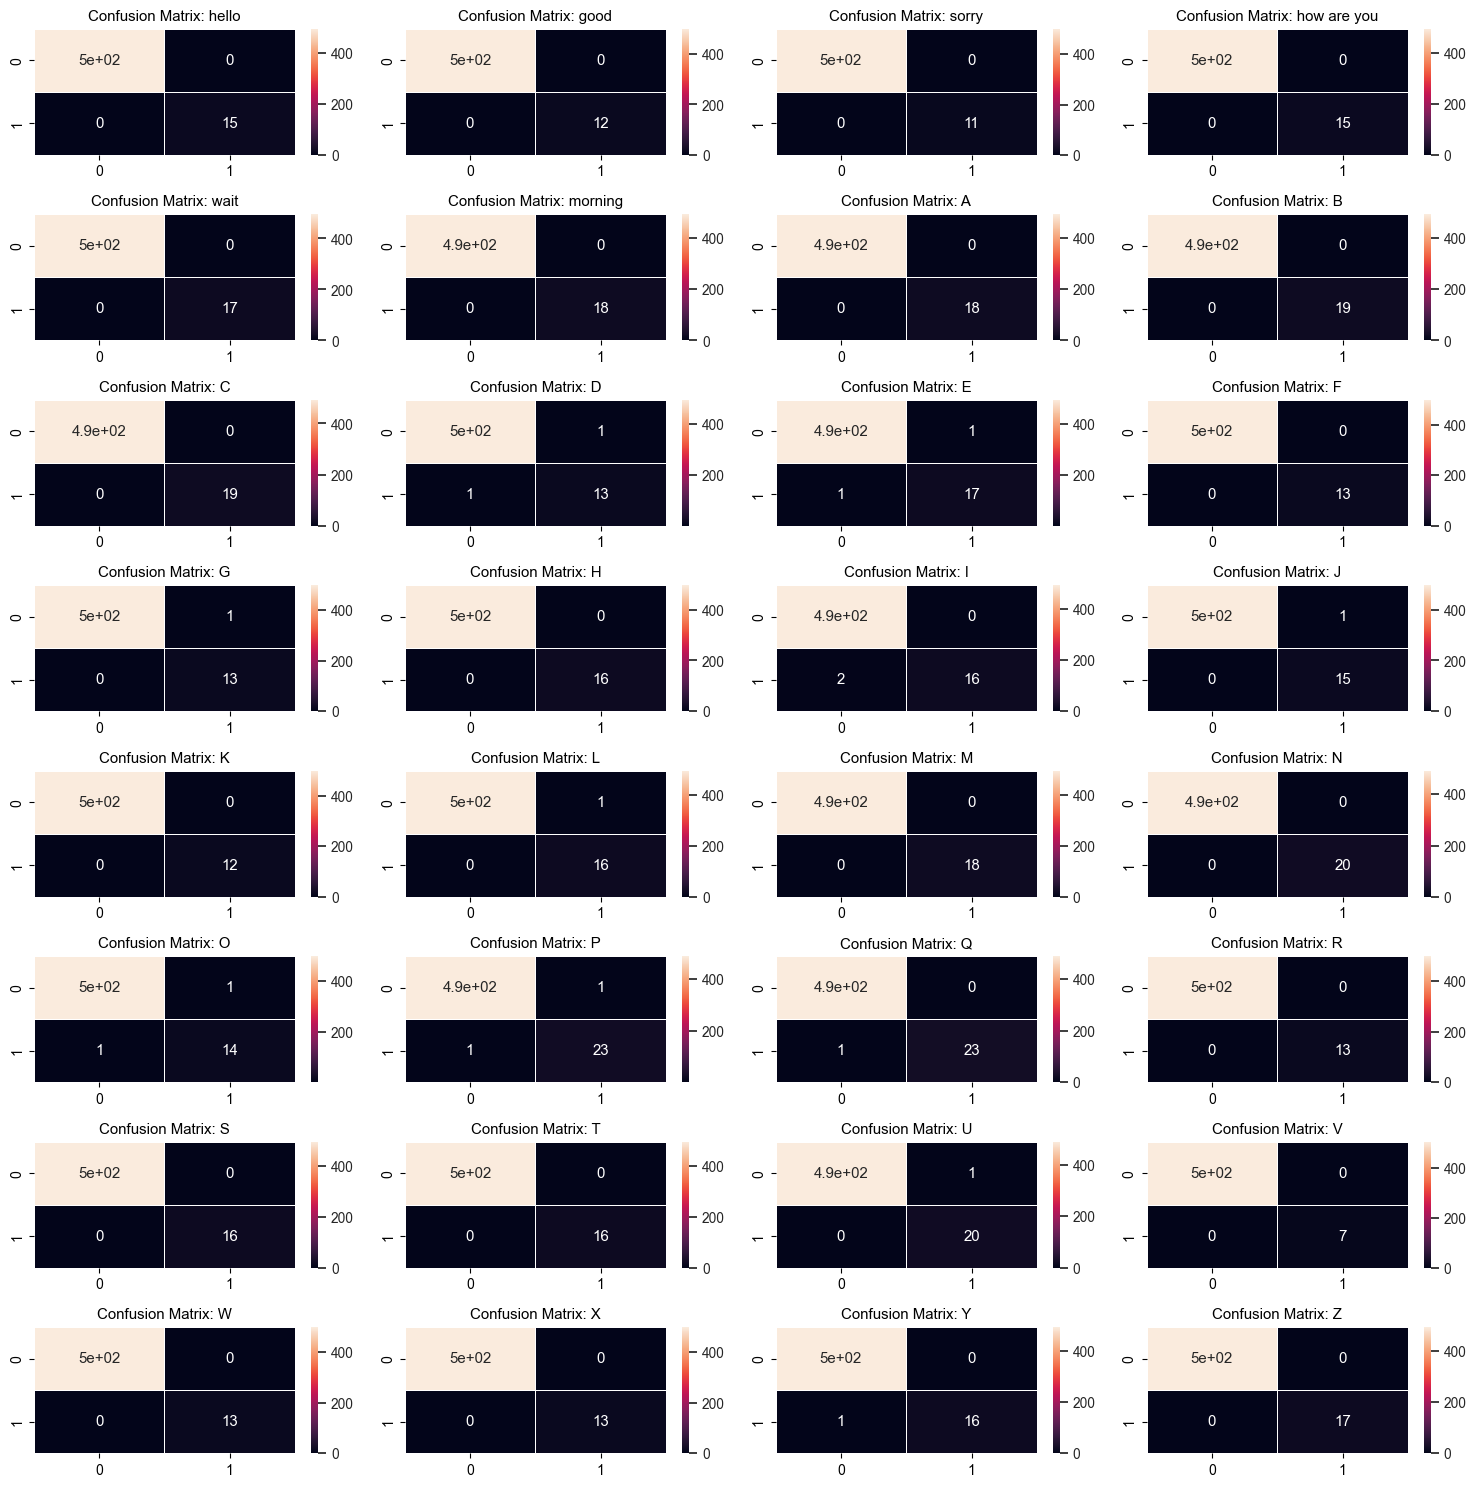

In [31]:
fig,axes = plt.subplots(8,4,figsize=(15,15))

#By converting axes to 1D array, we can loop through and create a confusion matrix graph for every gesture
for i, ax in enumerate(axes.flatten()):
    sns.set(font_scale=0.9)
    sns.heatmap(cm[i], annot=True,linewidths=.5,ax=ax)
    ax.set_title(f"Confusion Matrix: {signs[i]}")

plt.tight_layout()
plt.show()
#fig.savefig(os.path.join('Model Training 2','LSTM','RNN+LSTMConfusionMatrix'))
    

In [32]:
#display report of accuracy, precision, recall for each class
print(classification_report(pred,y_true))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        19
           9       0.93      0.93      0.93        14
          10       0.94      0.94      0.94        18
          11       1.00      1.00      1.00        13
          12       0.93      1.00      0.96        13
          13       1.00      1.00      1.00        16
          14       1.00      0.89      0.94        18
          15       0.94      1.00      0.97        15
          16       1.00      1.00      1.00        12
          17       0.94    

In [ ]:
#Save the model to reuse model without losing the weights
model.save("GRU")

In [39]:
#store translated word after predicting live data
translation=None
temp=None

#capture 40 frames of keypoints (what model expects) and use for model to predict
live_sequence=[]

#model = load_model('slr4bsl-handsgru-5502')
#initalising holistic model
hands = mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.7)
cap = cv2.VideoCapture(0)
cv2.startWindowThread()

cv2.namedWindow("SLR4BSL", cv2.WINDOW_NORMAL)

#The first three booleans are used to switch bewteen modes - the default window is set to True
slrWindow = True
trainingWindow = False
helpWindow = False

#This also is used to switch between the GRU and LSTM model
switch_model = False

while cap.isOpened():
    success, frame = cap.read()
    
    if not success:
        print("Empty Frame")
        pass
    
    try:
        results, image = mediapipe_detections(hands,frame)
        
        if results.multi_hand_landmarks:
            hand_keypoints = np.array([[res.x,res.y,res.z] for res in results.multi_hand_landmarks[-1].landmark]).flatten()
        else:
            #the model leveraged will expect the same total number of landmarks (63), so we need a zeros array when hands not detected
            hand_keypoints = np.zeros(21*3)
        
        #store keypoints in sequence array
        live_sequence.append(hand_keypoints)
        
        #take the last 40 frames from live sequence - what the model expects
        live_sequence = live_sequence[-40:]
        
        #model expects a batch dimension so we must put the sequence in one
        pred = model.predict(np.expand_dims(live_sequence,axis=0))[0]
        temp = translation
        
        #The highest probability in pred is stored to check if it is over 90%
        sign_index = np.argmax(pred)
        
        if sign_index > 0.9:
            translation = signs[sign_index]
            print(translation)
            

        
        #display text output of predicted sign
        cv2.putText(image,f"{translation}",(350,650),
                    cv2.FONT_HERSHEY_SIMPLEX, 3, (255,255,255),3, cv2.LINE_AA)
        
        if switch_model == False:
            cv2.putText(image,'GRU',(1000,100),
                        cv2.FONT_HERSHEY_DUPLEX, 2, (255,255,255),3, cv2.LINE_AA)
        elif switch_model:
            cv2.putText(image,'LSTM',(1000,100),
                        cv2.FONT_HERSHEY_DUPLEX, 2, (255,255,255),3, cv2.LINE_AA)

    except:
        pass
    
    #logic of opening different windows (main window, training window and help window)
    slrWindow,trainingWindow, helpWindow = switch_modes(slrWindow,trainingWindow,helpWindow)
        
    
    #close video capture logic
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
    #switch to training mode
    elif cv2.waitKey(10) & 0xFF==ord('t'):
        slrWindow = False
        trainingWindow = not trainingWindow
        helpWindow = False
    #switch to help mode
    elif cv2.waitKey(10) & 0xFF==ord('h'):
        slrWindow = False
        trainingWindow = False
        helpWindow = not helpWindow
    elif cv2.waitKey(10) & 0xFF==ord('s'):
        switch_models(switch_model)
           
        
    
    
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

1/1 [==============================] - 0s 9ms/step
J
1/1 [==============================] - 0s 8ms/step
J
1/1 [==============================] - 0s 9ms/step
sorry
1/1 [==============================] - 0s 21ms/step
sorry
1/1 [==============================] - 0s 8ms/step
sorry
1/1 [==============================] - 0s 9ms/step
sorry
1/1 [==============================] - 0s 10ms/step
morning
1/1 [==============================] - 0s 9ms/step
morning
1/1 [==============================] - 0s 9ms/step
sorry
1/1 [==============================] - 0s 9ms/step
sorry
1/1 [==============================] - 0s 10ms/step
sorry
1/1 [==============================] - 0s 11ms/step
sorry
1/1 [==============================] - 0s 10ms/step
sorry
1/1 [==============================] - 0s 12ms/step
sorry
1/1 [==============================] - 0s 11ms/step
sorry
1/1 [==============================] - 0s 10ms/step
sorry
1/1 [==============================] - 0s 12ms/step
sorry
1/1 [=====================

OSError: No file or directory found at slr4bsl-handsgru-5502

## Section 7 - Additional Functionalities

Beyond Section 6 is the implementation of additional features that aid our base SLR model to go beyond our aim. To summarise, we have the text-to-speech, training mode and a help mode feature.

### Training Mode
Training mode is essentially a way to practise random BSL gestures. Instead of predicting live gestures as we did in Section 6, we now predict the gestures to check if the users gesture has been performed correclty. 

### Help Mode
Help Mode allows users to watch specific BSL gestures they need help with, using the videos we collected during data collection. This requires a user input, which we obtain using a basic tkinter GUI and using that to display the specific sign gesture video

### Text-To-Speech
Text to speech provides an audio output of the predicted gesture along with its text output. To achieve a text to speech output, we used the library gTTS and playsound. To summarise, the predicted gesture is stored in gTTS and saved as an mp3 file to process the audio output, in which then the playsound library simply plays the mp3 file. 

In [34]:
import random

In [35]:
def training_mode():
   #store translated word after predicting live data
    translation=None
    
    sign = random.choice(signs)
    #capture 40 frames of keypoints (what model expects) and use for model to predict
    sequence=[]

    model=load_model('slr4bsl-handsgru-5502')
    
    #initalising holistic model
    hands = mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.7)
    cap = cv2.VideoCapture(0)
    cv2.startWindowThread()


    while cap.isOpened():
        success, frame = cap.read()

        if not success:
            print("Empty Frame")
            pass

        try:
            results, image = mediapipe_detections(hands, frame)

            cv2.putText(image,f'Practise {sign}',(250,650),
                                cv2.FONT_HERSHEY_SIMPLEX, 3, (255,255,255),3, cv2.LINE_AA)
            cv2.circle(image,(60,100),25,(0,0,255),-1)

            if results.multi_hand_landmarks:
                hand_keypoints = np.array([[res.x,res.y,res.z] for res in results.multi_hand_landmarks[-1].landmark]).flatten()
            else:
                #the model leveraged will expect the same total number of landmarks (63), so we need a zeros array when hands not detected
                hand_keypoints = np.zeros(21*3)
                
            #store keypoints in sequence array
            sequence.append(hand_keypoints)

            #reduce sequence length to 30 values - what the model expects
            sequence = sequence[-40:]

            #model expects a batch dimension so we must put the sequence in one
            pred = model.predict(np.expand_dims(sequence,axis=0))[0]
            translation = signs[np.argmax(pred)]
            print(translation)

            #verifying if user sign gesture is same as sign gesture
            if translation == sign:
                cv2.circle(image,(60,100),25,(0,255,0),-1)
                print('correct')
                sign = random.choice(signs)
            
            #gives option to skip to a different gesture
            if cv2.waitKey(10) & 0xFF==ord('n'):
                sign = random.choice(signs)


        except:
            pass
        cv2.imshow("SLR4BSL Training Mode", image)

         #close video capture logic
        if cv2.waitKey(10) & 0xFF==ord('q'):
            end = True
            break
    

    return end
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)


In [36]:
def help_mode():
    #the user input is stored to find video filepath of specific sign
    sign = get_userInput()
    
    #important to check if filepath exists - otherwise break
    if os.path.exists(os.path.join(data_folder,'Help Videos',f'{sign}.mp4')):
        
        #optional - but we loop the video 3 times
        for counter in range(3):
            cap = cv2.VideoCapture(os.path.join(data_folder,'Help Videos',f'{sign}.mp4'))
            cv2.startWindowThread()


            while cap.isOpened():
                success, frame = cap.read()

                if not success:
                    print("End of Video")
                    break

                cv2.putText(frame,f'{sign}',(450,650),
                        cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,0),3, cv2.LINE_AA)


                cv2.imshow("SLR4BSL Help Mode", frame)

                 #close video capture logic
                if cv2.waitKey(50) & 0xFF==ord('q'):
                    break
    
    #once video is complete or incorrect input, help mode is destroyed
    end = True
    return end
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [37]:
#optional feature - for observational purposes
def switch_models(switch_model):
    if switch_model == False:
        print("Switching to LSTM")
        model = load_model('slr4bsl-handsLSTM-950')
        switch_model = True
           
    elif switch_model:
        print("Switching to GRU")
        model = load_model('slr4bsl-handsgru-5502')
        switch_model = False
    
    return switch_model

In [38]:
def switch_modes(window1,window2,window3):
    #logic of opening different windows (main window, training window and help window)
    
    #shows main window
    if window1:
        cv2.imshow("SLR4BSL", image)
        cv2.destroyWindow("SLR4BSL Training Mode")
        cv2.destroyWindow("SLR4BSL Help Mode")
        
    #shows training mode window
    elif window2:
        endWindow2 = training_mode()
        cv2.destroyWindow("SLR4BSL")
        if endWindow2:
            window1=True
            window2=False
            
    #shows help mode window
    elif window3:
        endWindow3 = help_mode()
        cv2.imshow("SLR4BSL", image)
        if endWindow3:
            window1=True
            window3=False
    
    return window1, window2, window3